# Importing Essential Libraries

In [37]:
# Data Handling and Manipulation
import numpy as np
import pandas as pd

# Machine Learning and Modeling
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Standard Scaler for feature scaling
scaler = StandardScaler()


# Loading the Traffic Volume Data

In [38]:
df_raw = pd.read_csv('Train.csv')
df_raw.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


# Data Exploration

In [39]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [40]:
df_raw['is_holiday'].nunique()

11

In [41]:
df_raw['weather_description'].nunique()

38

In [42]:
df_raw['weather_type'].nunique()

11

# Data Visulization

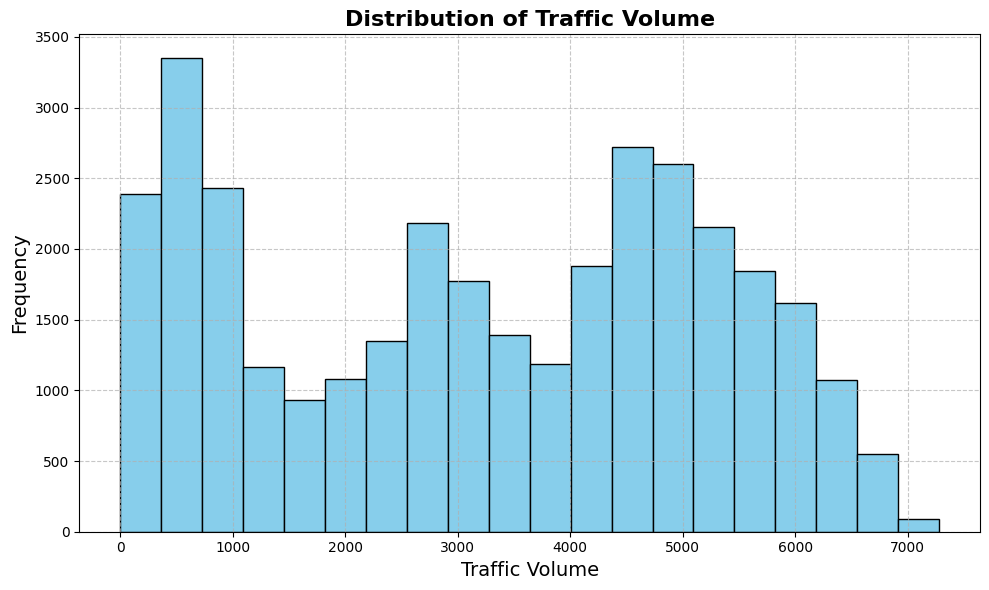

In [43]:
# Plotting the histogram
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df_raw['traffic_volume'], bins=20, color='skyblue', edgecolor='black')  # Custom bin count, color, and edge

# Adding title
plt.title('Distribution of Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

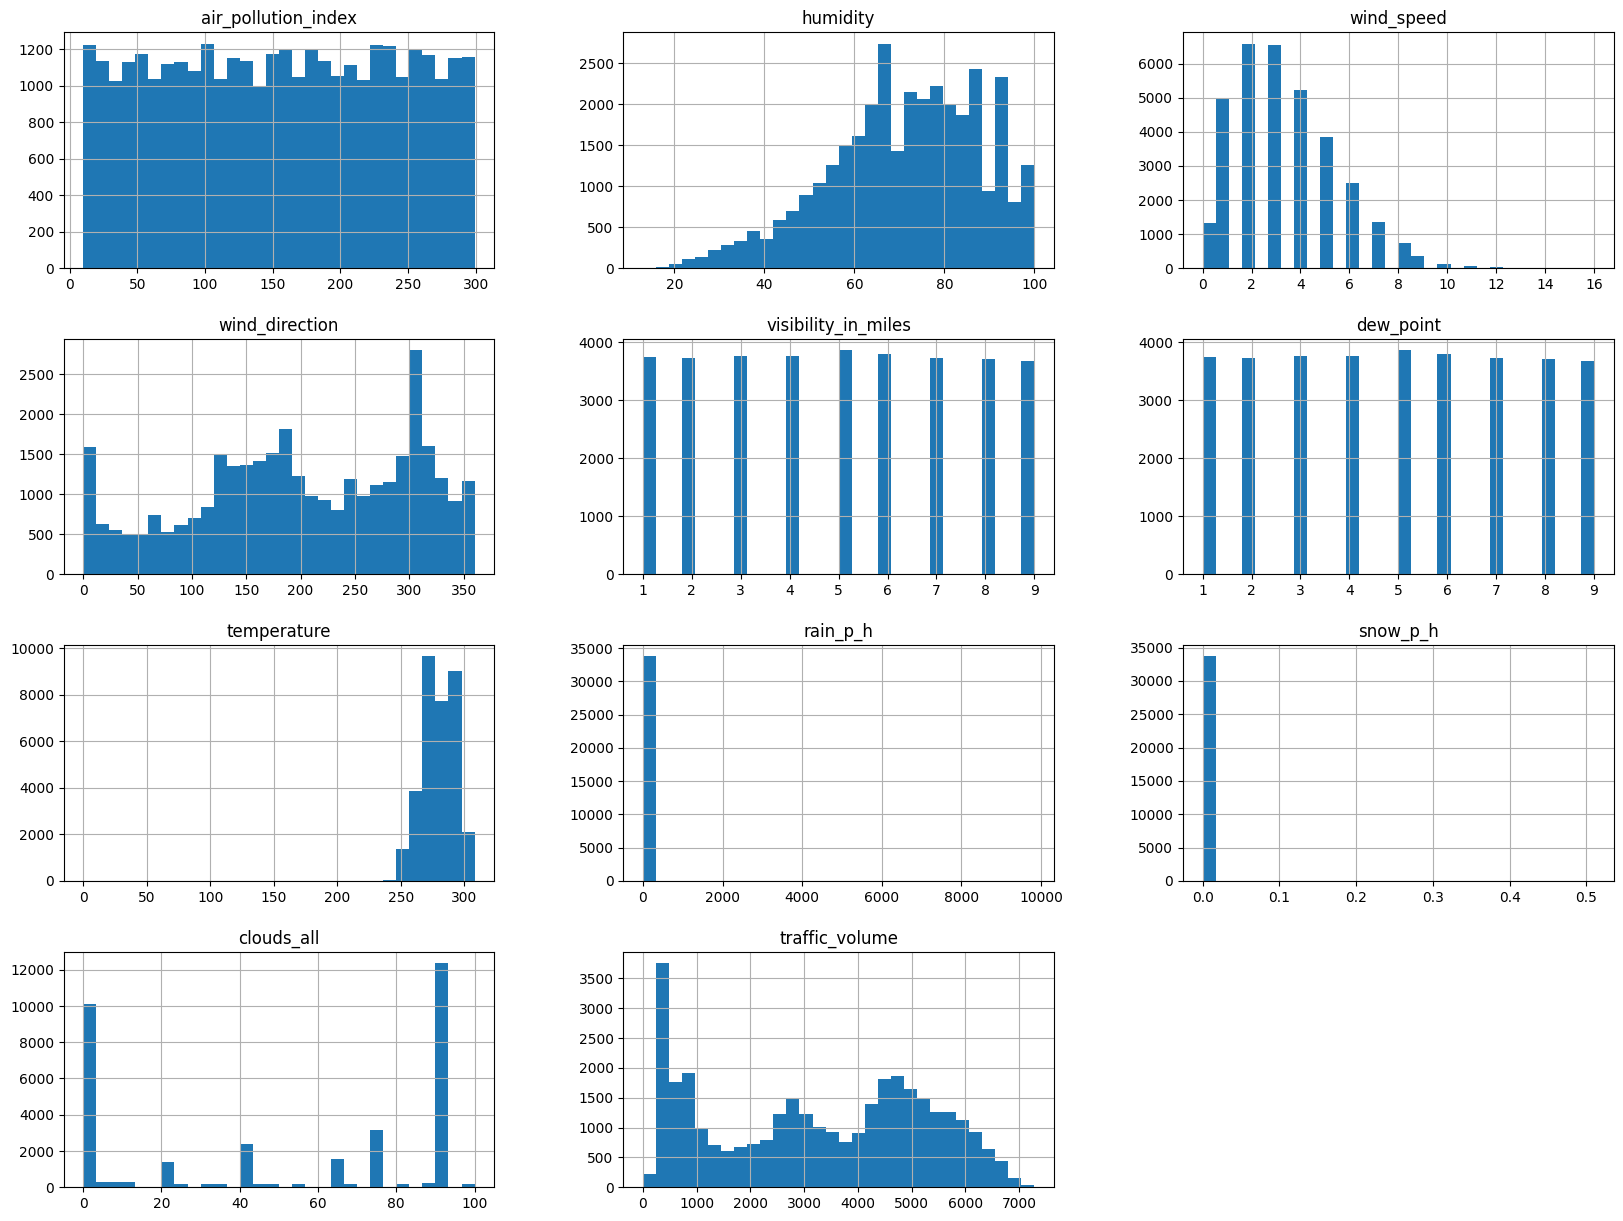

In [44]:
# Plot histograms for all numerical features in train data
df_raw.hist(bins = 30,figsize = (20,15))
plt.show()

<ipython-input-45-f386f2cc3615>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='Set2', edgecolor='black')  # Use a pleasant color palette and black edges for clarity


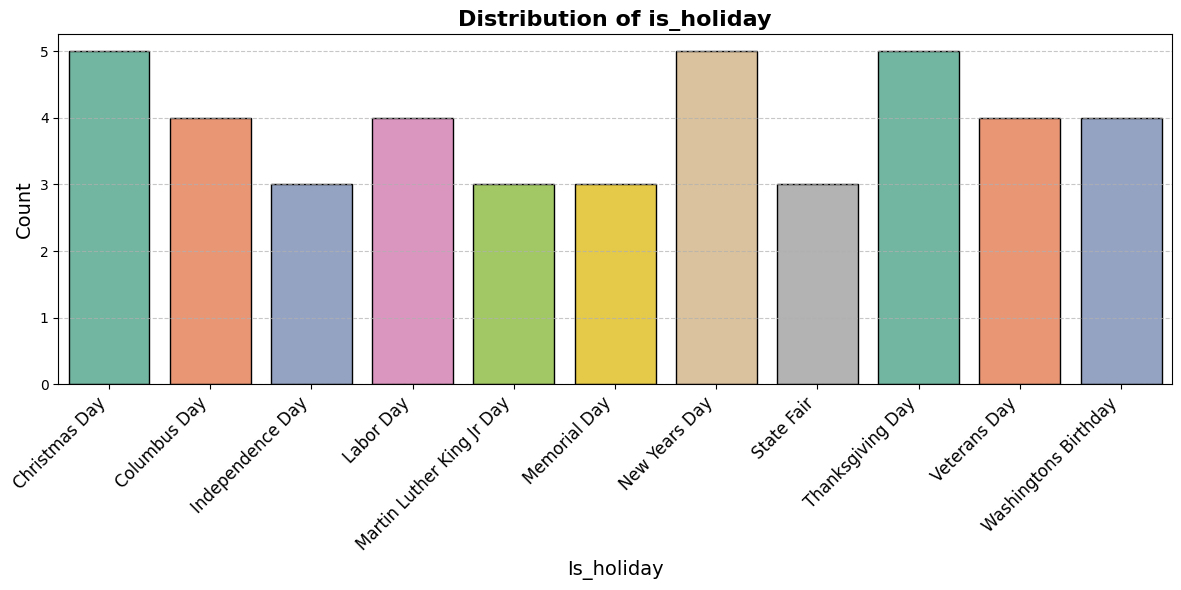

<ipython-input-45-f386f2cc3615>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='Set2', edgecolor='black')  # Use a pleasant color palette and black edges for clarity


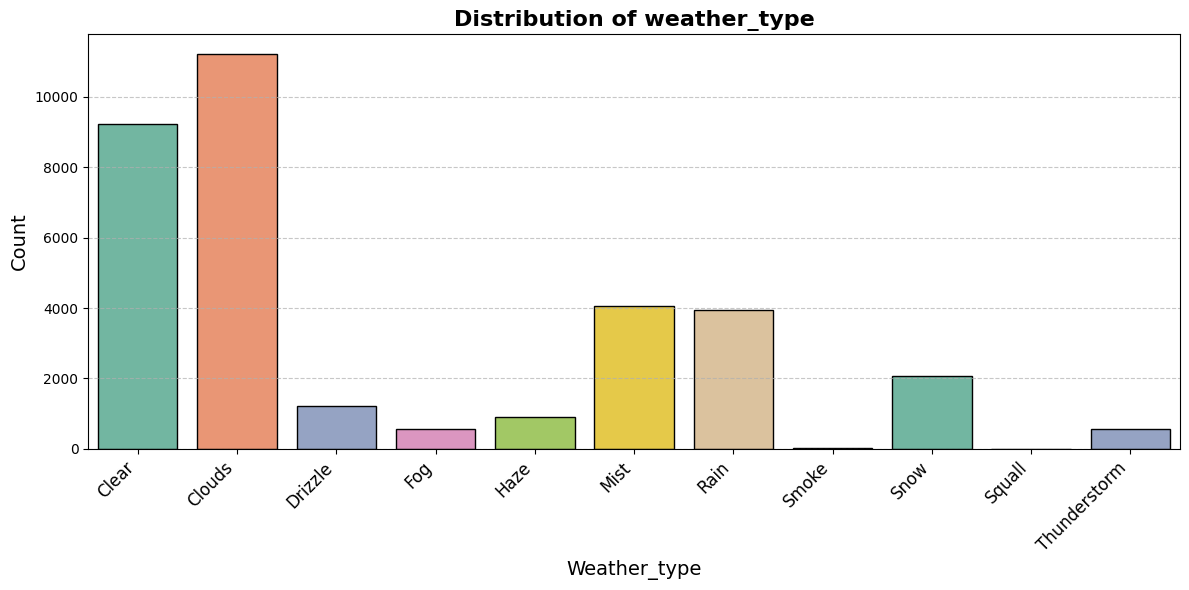

<ipython-input-45-f386f2cc3615>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='Set2', edgecolor='black')  # Use a pleasant color palette and black edges for clarity


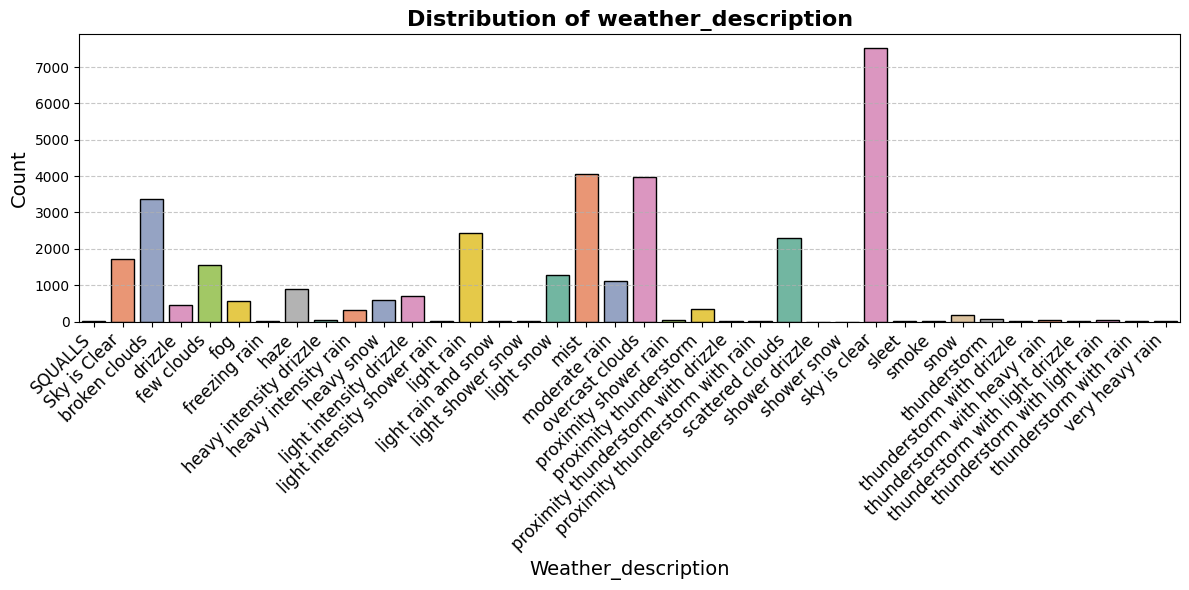

In [45]:
# Analyzing Categorical Features
data = df_raw.copy()
data['is_holiday'] = data['is_holiday'].astype('category')
data['weather_type'] = data['weather_type'].astype('category')
data['weather_description'] = data['weather_description'].astype('category')

# Plotting the distribution of categorical features
categorical_features = ['is_holiday', 'weather_type', 'weather_description']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))  # Increase the figure size for better clarity
    sns.countplot(x=data[feature], palette='Set2', edgecolor='black')  # Use a pleasant color palette and black edges for clarity

    # Adding title and labels
    plt.title(f'Distribution of {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)


    plt.xticks(rotation=45, ha='right', fontsize=12)


    plt.grid(True, linestyle='--', alpha=0.7, axis='y')


    plt.tight_layout()

    # Show the plot
    plt.show()

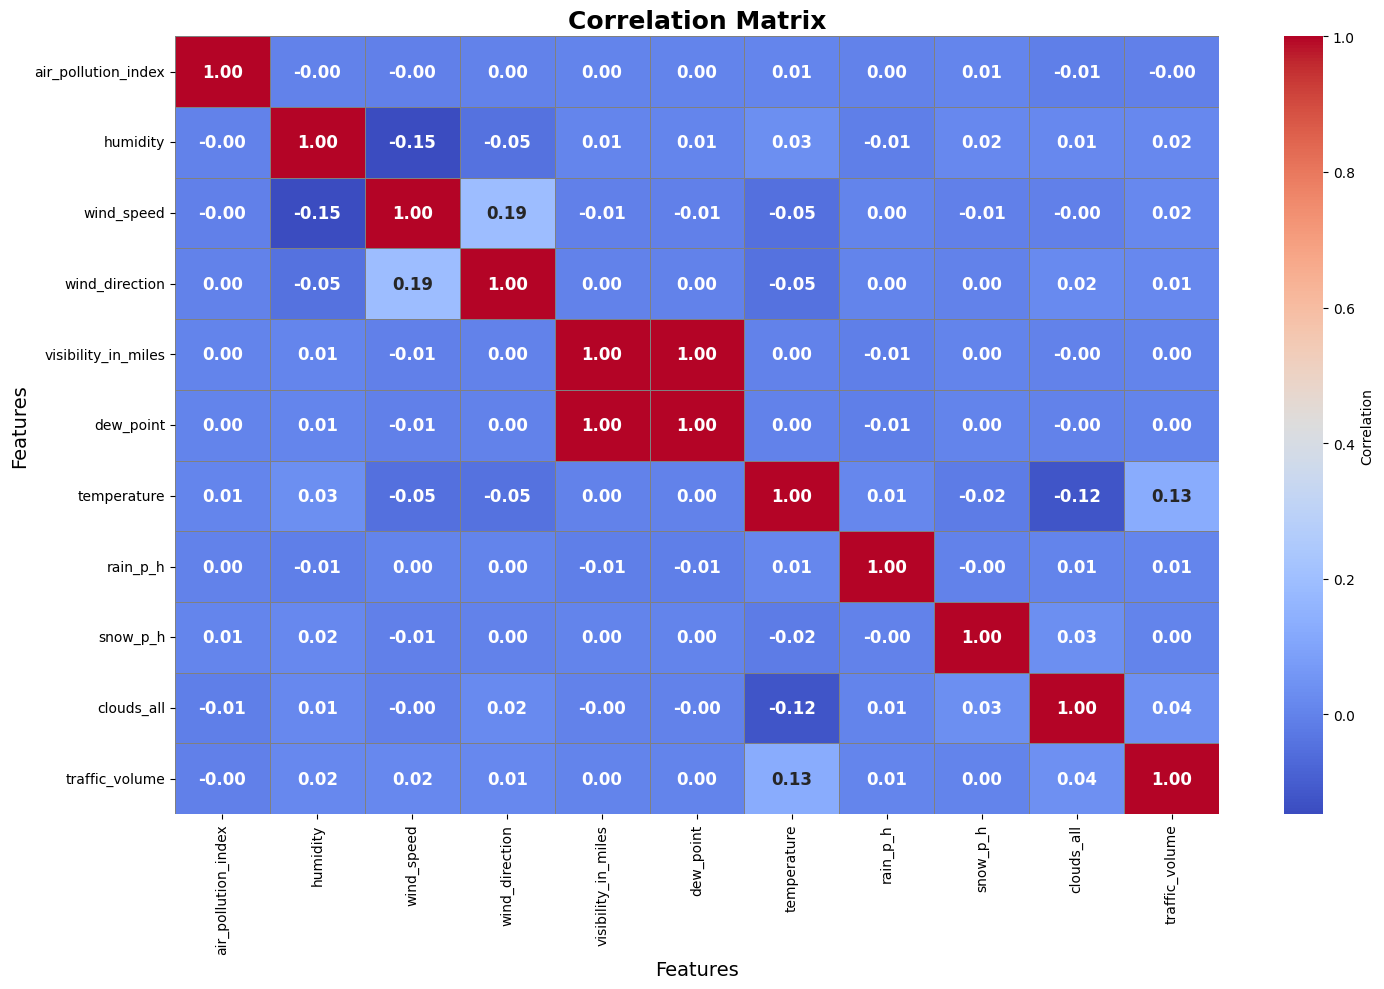

In [46]:
# Compute the correlation matrix for numeric columns
data = df_raw.select_dtypes(include='number')
correlation_matrix = data.corr()

# Generate a heatmap to visualize correlations
plt.figure(figsize=(15, 10))  # Set the figure size

# Generate heatmap with enhanced styling
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            cbar_kws={'label': 'Correlation'},
            linewidths=0.5,
            linecolor='gray',
            annot_kws={"size": 12, 'weight': 'bold'},
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)

# Adding title and refining labels
plt.title("Correlation Matrix", fontsize=18, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Data Preprocessing for LSTM

In [47]:
# Convert 'date_time' column to datetime format for proper time series manipulation
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'])

# Set the 'date_time' column as the index for time-based indexing
df_raw.set_index('date_time', inplace=True)

# Display the first few rows to verify the changes
df_raw.head()


,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,
2012-10-02 09:00:00,NaN,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,NaN,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,NaN,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,NaN,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,NaN,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


# One Hot encoding

In [48]:
df_is_holiday = pd.get_dummies(df_raw['is_holiday'])
df_weather_type = pd.get_dummies(df_raw['weather_type'])
df_weather_description = pd.get_dummies(df_raw['weather_description'])


In [49]:
df_is_holiday.info()
df_weather_type.info()
df_weather_description.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Christmas Day              33750 non-null  bool 
 1   Columbus Day               33750 non-null  bool 
 2   Independence Day           33750 non-null  bool 
 3   Labor Day                  33750 non-null  bool 
 4   Martin Luther King Jr Day  33750 non-null  bool 
 5   Memorial Day               33750 non-null  bool 
 6   New Years Day              33750 non-null  bool 
 7   State Fair                 33750 non-null  bool 
 8   Thanksgiving Day           33750 non-null  bool 
 9   Veterans Day               33750 non-null  bool 
 10  Washingtons Birthday       33750 non-null  bool 
dtypes: bool(11)
memory usage: 626.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Dat

# Combine all new dataframes

In [50]:
df_processed = pd.concat([df_raw, df_is_holiday, df_weather_type, df_weather_description], axis=1)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 74 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   is_holiday                           43 non-null     object 
 1   air_pollution_index                  33750 non-null  int64  
 2   humidity                             33750 non-null  int64  
 3   wind_speed                           33750 non-null  int64  
 4   wind_direction                       33750 non-null  int64  
 5   visibility_in_miles                  33750 non-null  int64  
 6   dew_point                            33750 non-null  int64  
 7   temperature                          33750 non-null  float64
 8   rain_p_h                             33750 non-null  float64
 9   snow_p_h                             33750 non-null  float64
 10  clouds_all                           33750 non-null  int64 

# Remove non-numeric columns

In [51]:
df_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

# Shift the target column to the rightmost position

In [52]:
# Extract the target variable 'traffic_volume' from the processed DataFrame
df_target = df_processed['traffic_volume']

# Display the target variable to verify its content (optional)
df_target.head()

,traffic_volume
date_time,
2012-10-02 09:00:00,5545
2012-10-02 10:00:00,4516
2012-10-02 11:00:00,4767
2012-10-02 12:00:00,5026
2012-10-02 13:00:00,4918


In [53]:
# Drop the 'traffic_volume' column from the DataFrame
df_processed.drop(columns=['traffic_volume'], inplace=True)

# Reassign the 'traffic_volume' back to the DataFrame from the target variable
df_processed['traffic_volume'] = df_target

# Display the updated DataFrame to verify the changes (optional)
df_processed.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,...,smoke,snow,thunderstorm,thunderstorm with drizzle,thunderstorm with heavy rain,thunderstorm with light drizzle,thunderstorm with light rain,thunderstorm with rain,very heavy rain,traffic_volume
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,121,89,2,329,1,1,288.28,0.0,0.0,40,...,False,False,False,False,False,False,False,False,False,5545
2012-10-02 10:00:00,178,67,3,330,1,1,289.36,0.0,0.0,75,...,False,False,False,False,False,False,False,False,False,4516
2012-10-02 11:00:00,113,66,3,329,2,2,289.58,0.0,0.0,90,...,False,False,False,False,False,False,False,False,False,4767
2012-10-02 12:00:00,20,66,3,329,5,5,290.13,0.0,0.0,90,...,False,False,False,False,False,False,False,False,False,5026
2012-10-02 13:00:00,281,65,3,329,7,7,291.14,0.0,0.0,75,...,False,False,False,False,False,False,False,False,False,4918


# Apply a scaling transformation

In [54]:
scaler = StandardScaler()
scaler = scaler.fit(df_processed)
df_processed_scaled = scaler.transform(df_processed)
df_processed_scaled

array([[-0.40415257,  1.05572004, -0.67040489, ..., -0.0261141 ,
        -0.02310017,  1.15738423],
       [ 0.27657226, -0.2497631 , -0.18396715, ..., -0.0261141 ,
        -0.02310017,  0.64067732],
       [-0.4996929 , -0.30910324, -0.18396715, ..., -0.0261141 ,
        -0.02310017,  0.76671564],
       ...,
       [-0.20112938, -0.07174267, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.52530271],
       [ 0.88564185, -0.30910324, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.96016003],
       [-0.17724429, -0.48712367, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.96016003]])

# Restructure the data to be compatible with LSTM

In [55]:
# Initialize empty lists to store training features and target values
trainX = []
trainY = []

# Define the number of past and future time steps
n_future = 1    # Number of future steps to predict
n_past = 14      # Number of past steps to consider for prediction

# Loop through the scaled DataFrame to create the features (trainX) and target (trainY)
for i in range(n_past, len(df_processed_scaled) - n_future + 1):
    # Append past observations (trainX) and the corresponding future value (trainY)
    trainX.append(df_processed_scaled[i - n_past:i, 0:df_processed.shape[1]])
    trainY.append(df_processed_scaled[i + n_future - 1:i + n_future, -1])

# Convert the lists to numpy arrays for model training
trainX, trainY = np.array(trainX), np.array(trainY)

# Print the shapes of the feature and target arrays for verification
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (33736, 14, 71).
trainY shape == (33736, 1).


# LSTM model

In [56]:
# Initialize the Sequential model for LSTM-based architecture
model = Sequential()

# Add the first LSTM layer with 64 units, ReLU activation, and return sequences for the next layer
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))

# Add the second LSTM layer with 32 units, ReLU activation, and no return sequences (final output)
model.add(LSTM(32, activation='relu', return_sequences=False))

# Add a Dropout layer to prevent overfitting by randomly setting 20% of the input units to 0
model.add(Dropout(0.2))

# Add the final Dense layer for output, with the same number of units as the target variable
model.add(Dense(trainY.shape[1]))

# Compile the model with the Adam optimizer and Mean Squared Error loss function
model.compile(optimizer='adam', loss='mse')

# Print the model summary to review the architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 14, 64)              │          34,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,265 (184.63 KB)

 Trainable params: 47,265 (184.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 0.5081 - val_loss: 0.0914
Epoch 2/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - loss: 0.1379 - val_loss: 0.1001
Epoch 3/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - loss: 0.1181 - val_loss: 0.0779
Epoch 4/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - loss: 0.1145 - val_loss: 0.0790
Epoch 5/5
1898/1898 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 0.1095 - val_loss: 0.0769


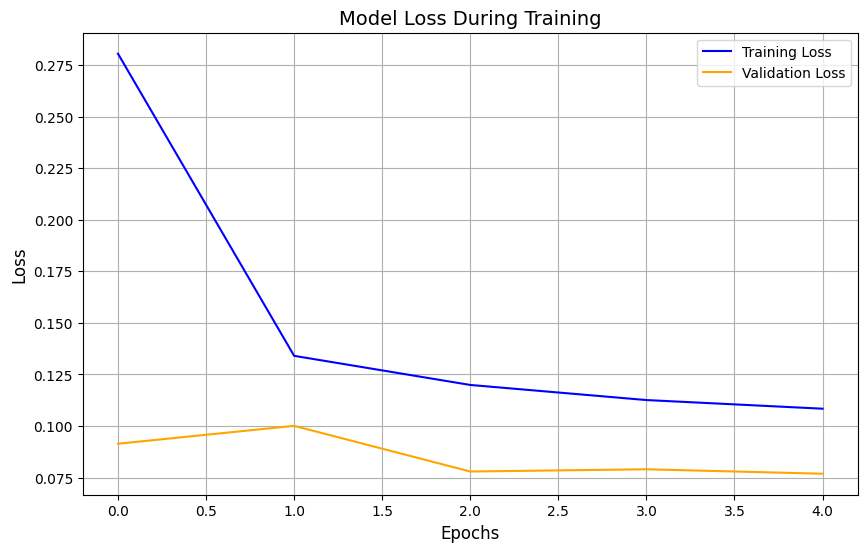

In [57]:
# Fit the model on the training data
history = model.fit(
    trainX,
    trainY,
    epochs=5,                # Number of epochs for training
    batch_size=16,           # Batch size for each update
    validation_split=0.1,    # Fraction of data to be used for validation
    verbose=1                # Display progress during training
)

# Plot training and validation loss to visualize the model's performance over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')    # Training loss curve
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')  # Validation loss curve


plt.title('Model Loss During Training', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)

# Add a legend to differentiate between training and validation losses
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

# Look at the graphical representations of the data

In [58]:
df_raww = pd.read_csv('Train.csv')

In [59]:
# Convert 'date_time' column to datetime format for proper time series manipulation
train_dates = pd.to_datetime(df_raww['date_time'])

# Print the last 30 dates to verify the conversion and check the most recent data
print("Last 30 dates in the dataset:")
print(train_dates.tail(30))  # Display the last 30 dates for inspection

Last 30 dates in the dataset:
33720   2017-05-17 10:00:00
33721   2017-05-17 10:00:00
33722   2017-05-17 11:00:00
33723   2017-05-17 12:00:00
33724   2017-05-17 12:00:00
33725   2017-05-17 13:00:00
33726   2017-05-17 13:00:00
33727   2017-05-17 14:00:00
33728   2017-05-17 15:00:00
33729   2017-05-17 16:00:00
33730   2017-05-17 16:00:00
33731   2017-05-17 17:00:00
33732   2017-05-17 17:00:00
33733   2017-05-17 18:00:00
33734   2017-05-17 18:00:00
33735   2017-05-17 18:00:00
33736   2017-05-17 18:00:00
33737   2017-05-17 19:00:00
33738   2017-05-17 19:00:00
33739   2017-05-17 19:00:00
33740   2017-05-17 20:00:00
33741   2017-05-17 20:00:00
33742   2017-05-17 20:00:00
33743   2017-05-17 21:00:00
33744   2017-05-17 21:00:00
33745   2017-05-17 21:00:00
33746   2017-05-17 22:00:00
33747   2017-05-17 22:00:00
33748   2017-05-17 23:00:00
33749   2017-05-17 23:00:00
Name: date_time, dtype: datetime64[ns]


# Prediction

In [60]:
n_days_for_prediction=200
prediction = model.predict(trainX[-n_days_for_prediction:])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


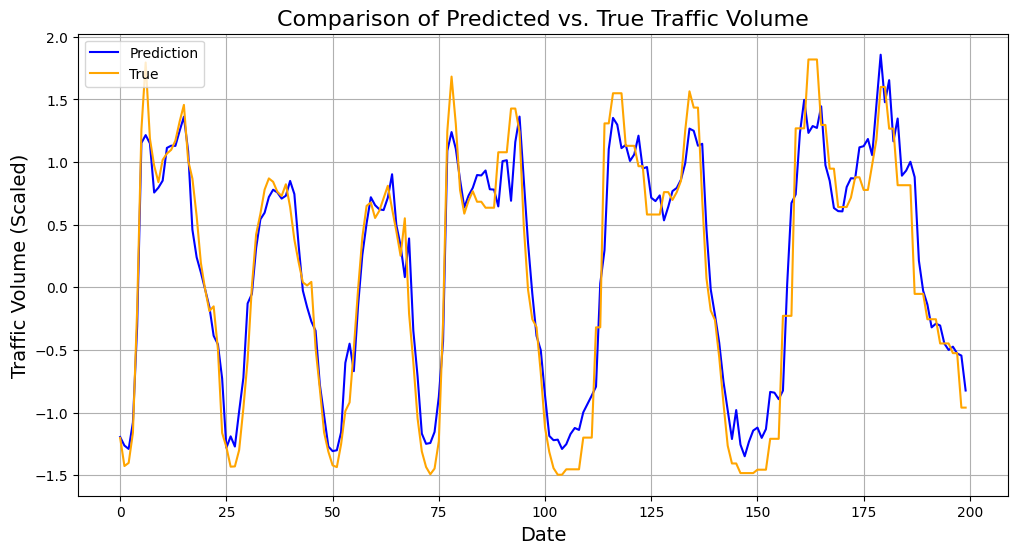

In [61]:
# Get the last n_days_for_prediction entries for the true traffic volume values
true = trainY[-n_days_for_prediction:]

# Plot the predicted traffic volume and the true values for comparison
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
plt.plot(prediction, label='Prediction', color='blue')  # Plot predictions in blue
plt.plot(true, label='True', color='orange')  # Plot true values in orange

# Add title and axis
plt.title('Comparison of Predicted vs. True Traffic Volume', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Traffic Volume (Scaled)', fontsize=14)

# Display legend to differentiate between the two curves
plt.legend(loc='upper left')

# Enhance plot readability with a grid
plt.grid(True)

# Show the plot
plt.show()

In [62]:
# Repeat the predictions along the feature axis (to match the shape of the scaled data)
prediction_copies = np.repeat(prediction, df_processed.shape[1], axis=-1)

# Inverse transform the scaled predictions to the original scale
y_pred_future = scaler.inverse_transform(prediction_copies)[:, -1]

# Display the future predictions to inspect the result
print("Future Predictions (Inverse Transformed):")
print(y_pred_future)


Future Predictions (Inverse Transformed):
[ 860.7168   724.802    671.30176 1092.6228  2623.892   5536.343
 5660.647   5528.458   4747.527   4825.162   4936.526   5456.942
 5492.242   5489.304   5729.3726  5953.26    5404.2163  4157.407
 3718.0579  3475.161   3207.1865  2928.1462  2469.9624  2335.441
 1791.0664   689.0239   870.9531   709.2661  1269.1227  1801.7642
 2984.365   3134.3765  3866.0178  4320.985   4426.869   4675.551
 4792.3574  4748.259   4651.0767  4696.7197  4932.1533  4723.1396
 3912.0227  3188.1506  2924.2664  2697.1533  2549.965   1691.806
 1205.2793   709.17114  636.39746  650.16895  936.6262  2040.2024
 2344.925   1907.284   2950.3809  3754.953   4256.3545  4672.686
 4546.3657  4480.951   4468.5073  4666.8804  5037.98    4232.234
 3905.4263  3402.728   4017.488   2551.7585  1825.8777   914.7031
  752.41895  765.5366   940.99414 1499.4998  2381.236   5411.5605
 5708.9023  5443.045   4950.9404  4509.764   4698.0244  4822.929
 5025.3594  5019.5874  5098.131   4799.59  

In [63]:
# Extract the true traffic volume values for the last 'n_days_for_prediction'
true = df_raw['traffic_volume'][-n_days_for_prediction:].values

# Display the true values for inspection
print("True Traffic Volume for the Last {} Days:".format(n_days_for_prediction))
print(true)


True Traffic Volume for the Last 200 Days:
[ 846  399  449  929 2897 5752 6815 5604 5175 4913 5267 5367 5426 5573
 5877 6141 5258 4970 4373 3626 3206 2864 2938 2261  925  700  389  393
  652 1320 2087 3251 4082 4407 4794 4972 4918 4759 4693 4879 4517 3999
 3640 3319 3270 3327 2267 1621  931  628  410  382  746 1273 1411 2271
 3214 4037 4535 4589 4343 4458 4658 4855 4488 4134 3743 4338 2820 2048
 1157  632  384  268  359  793 2699 5723 6591 5836 4786 4412 4619 4768
 4601 4601 4506 4506 4506 5388 5388 5388 6083 6083 5714 4212 3203 2734
 2607 1877 1008  624  366  261  261  347  347  347  347  851  851  851
 2604 2604 5847 5847 6326 6326 6326 5490 5490 5490 5166 5166 4398 4398
 4398 4398 4754 4754 4630 4753 4934 5735 6357 6098 6098 4632 3382 2871
 2720 2129 1394  722  440  440  287  287  287  287  341  341  341  832
  832  832 2787 2787 2787 5768 5768 5768 6863 6863 6863 5822 5822 5127
 5127 4517 4517 4517 4666 4990 4990 4789 4789 5185 5590 6426 6426 5763
 5763 4864 4864 4864 4864 3136 313

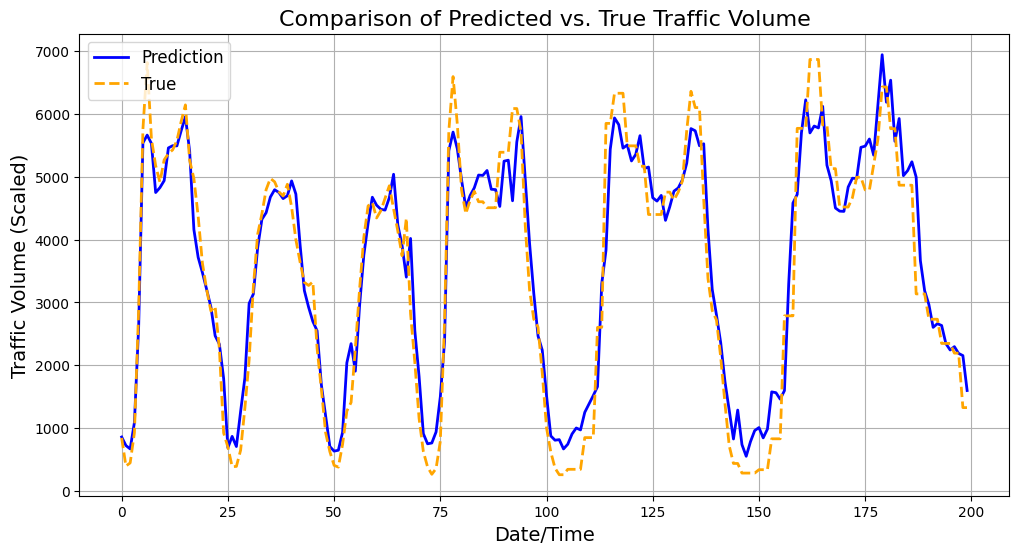

In [64]:
# Plot the predicted future values and the true traffic volume for comparison
plt.figure(figsize=(12, 6))
plt.plot(y_pred_future, label='Prediction', color='blue', linestyle='-', linewidth=2)  # Plot prediction in blue
plt.plot(true, label='True', color='orange', linestyle='--', linewidth=2)  # Plot true values in orange with dashed line

# Add title and labels
plt.title('Comparison of Predicted vs. True Traffic Volume', fontsize=16)
plt.xlabel('Date/Time', fontsize=14)
plt.ylabel('Traffic Volume (Scaled)', fontsize=14)

# Display the legend to differentiate between prediction and true values
plt.legend(loc='upper left', fontsize=12)


plt.grid(True)

# Display the plot
plt.show()


# Classification model Building

# SVM

In [65]:
# Convert traffic volume into categories (Low, Medium, High)
bins = [0, 1000, 5000, np.inf]
labels = ['Low', 'Medium', 'High']
df_processed['traffic_volume_category'] = pd.cut(df_processed['traffic_volume'], bins=bins, labels=labels)

In [66]:
# Drop rows with missing values
df_processed = df_processed.dropna()

# Check again for missing values to confirm no NaNs remain
print(df_processed.isnull().sum())

air_pollution_index             0
humidity                        0
wind_speed                      0
wind_direction                  0
visibility_in_miles             0
                               ..
thunderstorm with light rain    0
thunderstorm with rain          0
very heavy rain                 0
traffic_volume                  0
traffic_volume_category         0
Length: 72, dtype: int64


In [67]:
# Split the data (after handling NaN)
X = df_processed.drop(columns=['traffic_volume', 'traffic_volume_category']).values  # Features
y = df_processed['traffic_volume_category'].values  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [68]:
# Check for NaN values in X_train and X_test after the split
print("Missing values in X_train:", pd.DataFrame(X_train).isnull().sum().sum())
print("Missing values in X_test:", pd.DataFrame(X_test).isnull().sum().sum())

Missing values in X_train: 0
Missing values in X_test: 0


In [69]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check for NaN values after scaling (though it should not be an issue if NaN is handled earlier)
print("Missing values in X_train_scaled:", pd.DataFrame(X_train_scaled).isnull().sum().sum())
print("Missing values in X_test_scaled:", pd.DataFrame(X_test_scaled).isnull().sum().sum())

Missing values in X_train_scaled: 0
Missing values in X_test_scaled: 0


In [70]:
# Train a Classification model (SVM)
svm_clf = SVC(kernel='rbf', C=100, gamma=0.1)
svm_clf.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.1)

In [72]:
# Predictions
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluate the model
print("SVM Classification Model Evaluation:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Model Evaluation:
              precision    recall  f1-score   support

        High       0.20      0.14      0.17      1422
         Low       0.25      0.16      0.19      1547
      Medium       0.56      0.71      0.63      3781

    accuracy                           0.46      6750
   macro avg       0.34      0.34      0.33      6750
weighted avg       0.41      0.46      0.43      6750



# Train a Classification model (Decision Tree)

In [74]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [75]:
# Predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Classification Model Evaluation:")
print(classification_report(y_test, y_pred))

Decision Tree Classification Model Evaluation:
              precision    recall  f1-score   support

        High       0.18      0.03      0.05      1422
         Low       0.30      0.15      0.20      1547
      Medium       0.57      0.86      0.69      3781

    accuracy                           0.53      6750
   macro avg       0.35      0.35      0.31      6750
weighted avg       0.43      0.53      0.44      6750



# Confusion Matrix

Text(95.72222222222221, 0.5, 'True')

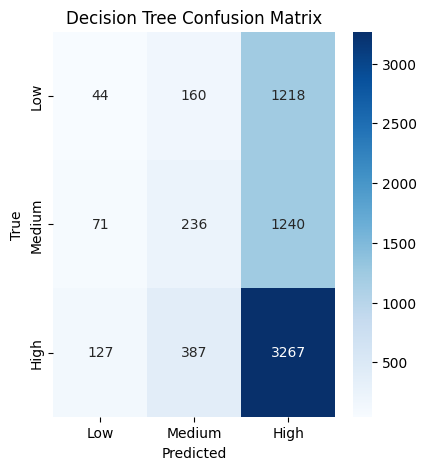

In [76]:
# Confusion Matrix for Decision Tree
from sklearn.metrics import confusion_matrix, roc_curve, auc
cm_dt = confusion_matrix(y_test, y_pred)
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

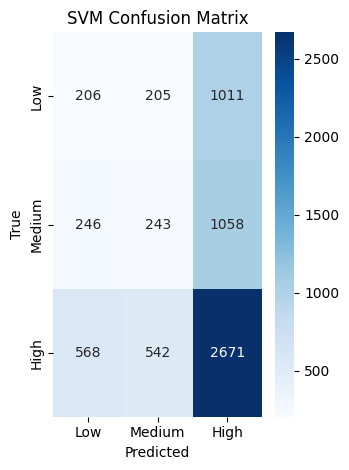

In [77]:
# Plot Confusion Matrix for SVM
plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()
